In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# READ DATA
# oil
brent = pd.read_csv("./dataset/DCOILBRENTEU.csv")
wti = pd.read_csv("./dataset/DCOILWTICO.csv")

# price level
uscpi        = pd.read_csv("./dataset/USCPI.csv") # % data
uscpi_energy = pd.read_csv("./dataset/USCPI_energy.csv") # % data
usppi        = pd.read_csv("./dataset/USPPI.csv")
usppi_energy = pd.read_csv("./dataset/USPPI_energe.csv")
euppi        = pd.read_csv("./dataset/EUPPI.csv") # % data

# stocks
# date, open, high, low, close, adjclose, volume (n * 7)
snp          = pd.read_csv("./dataset/s&p.csv")
djia         = pd.read_csv("./dataset/djia.csv")
nasdaq       = pd.read_csv("./dataset/nasdaq.csv")
nyse         = pd.read_csv("./dataset/nyse.csv")

# others
gold         = pd.read_csv("./dataset/gold.csv")

In [4]:
# PREPROCESSING
# stocks : use close price
snp          = snp[["Date", "Close"]]
djia         = djia[["Date", "Close"]]
nasdaq       = nasdaq[["Date", "Close"]]
nyse         = nyse[["Date", "Close"]]

In [5]:
dataset = {
    # oil
    "brent"        : brent,
    "wti"          : wti,
    
    # price level
    "uscpi"        : uscpi, 
    "uscpi_energy" : uscpi_energy,
    "usppi"        : usppi,
    "usppi_energy" : usppi_energy,
    "euppi"        : euppi,
    
    # stocks
    "snp"          : snp,
    "djia"         : djia,
    "nasdaq"       : nasdaq,
    "nyse"         : nyse,
    
    # others
    "gold"         : gold,
}

In [6]:
for dataname, data in dataset.items():
    print("----------")
    print(dataname)
    print(data.describe())
    print("----------")


----------
brent
       DCOILBRENTEU
count   8335.000000
mean      46.533457
std       32.524606
min        9.100000
25%       18.780000
50%       31.950000
75%       67.160000
max      143.950000
----------
----------
wti
        DCOILWTICO
count  8621.000000
mean     44.203293
std      29.135570
min      10.250000
25%      19.730000
50%      31.270000
75%      63.360000
max     145.310000
----------
----------
uscpi
       CPALTT01USM657N
count       721.000000
mean          0.302309
std           0.354946
min          -1.915290
25%           0.068634
50%           0.290135
75%           0.500000
max           1.805869
----------
----------
uscpi_energy
       CPGREN01USM657N
count       721.000000
mean          0.341754
std           2.392792
min         -17.974961
25%          -0.574713
50%           0.248756
75%           1.169591
max          11.468382
----------
----------
usppi
            PPIACO
count  1286.000000
mean     70.730949
std      62.262817
min      10.300000
25%   

In [7]:
# function to normalize dataset ; by minmax
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom

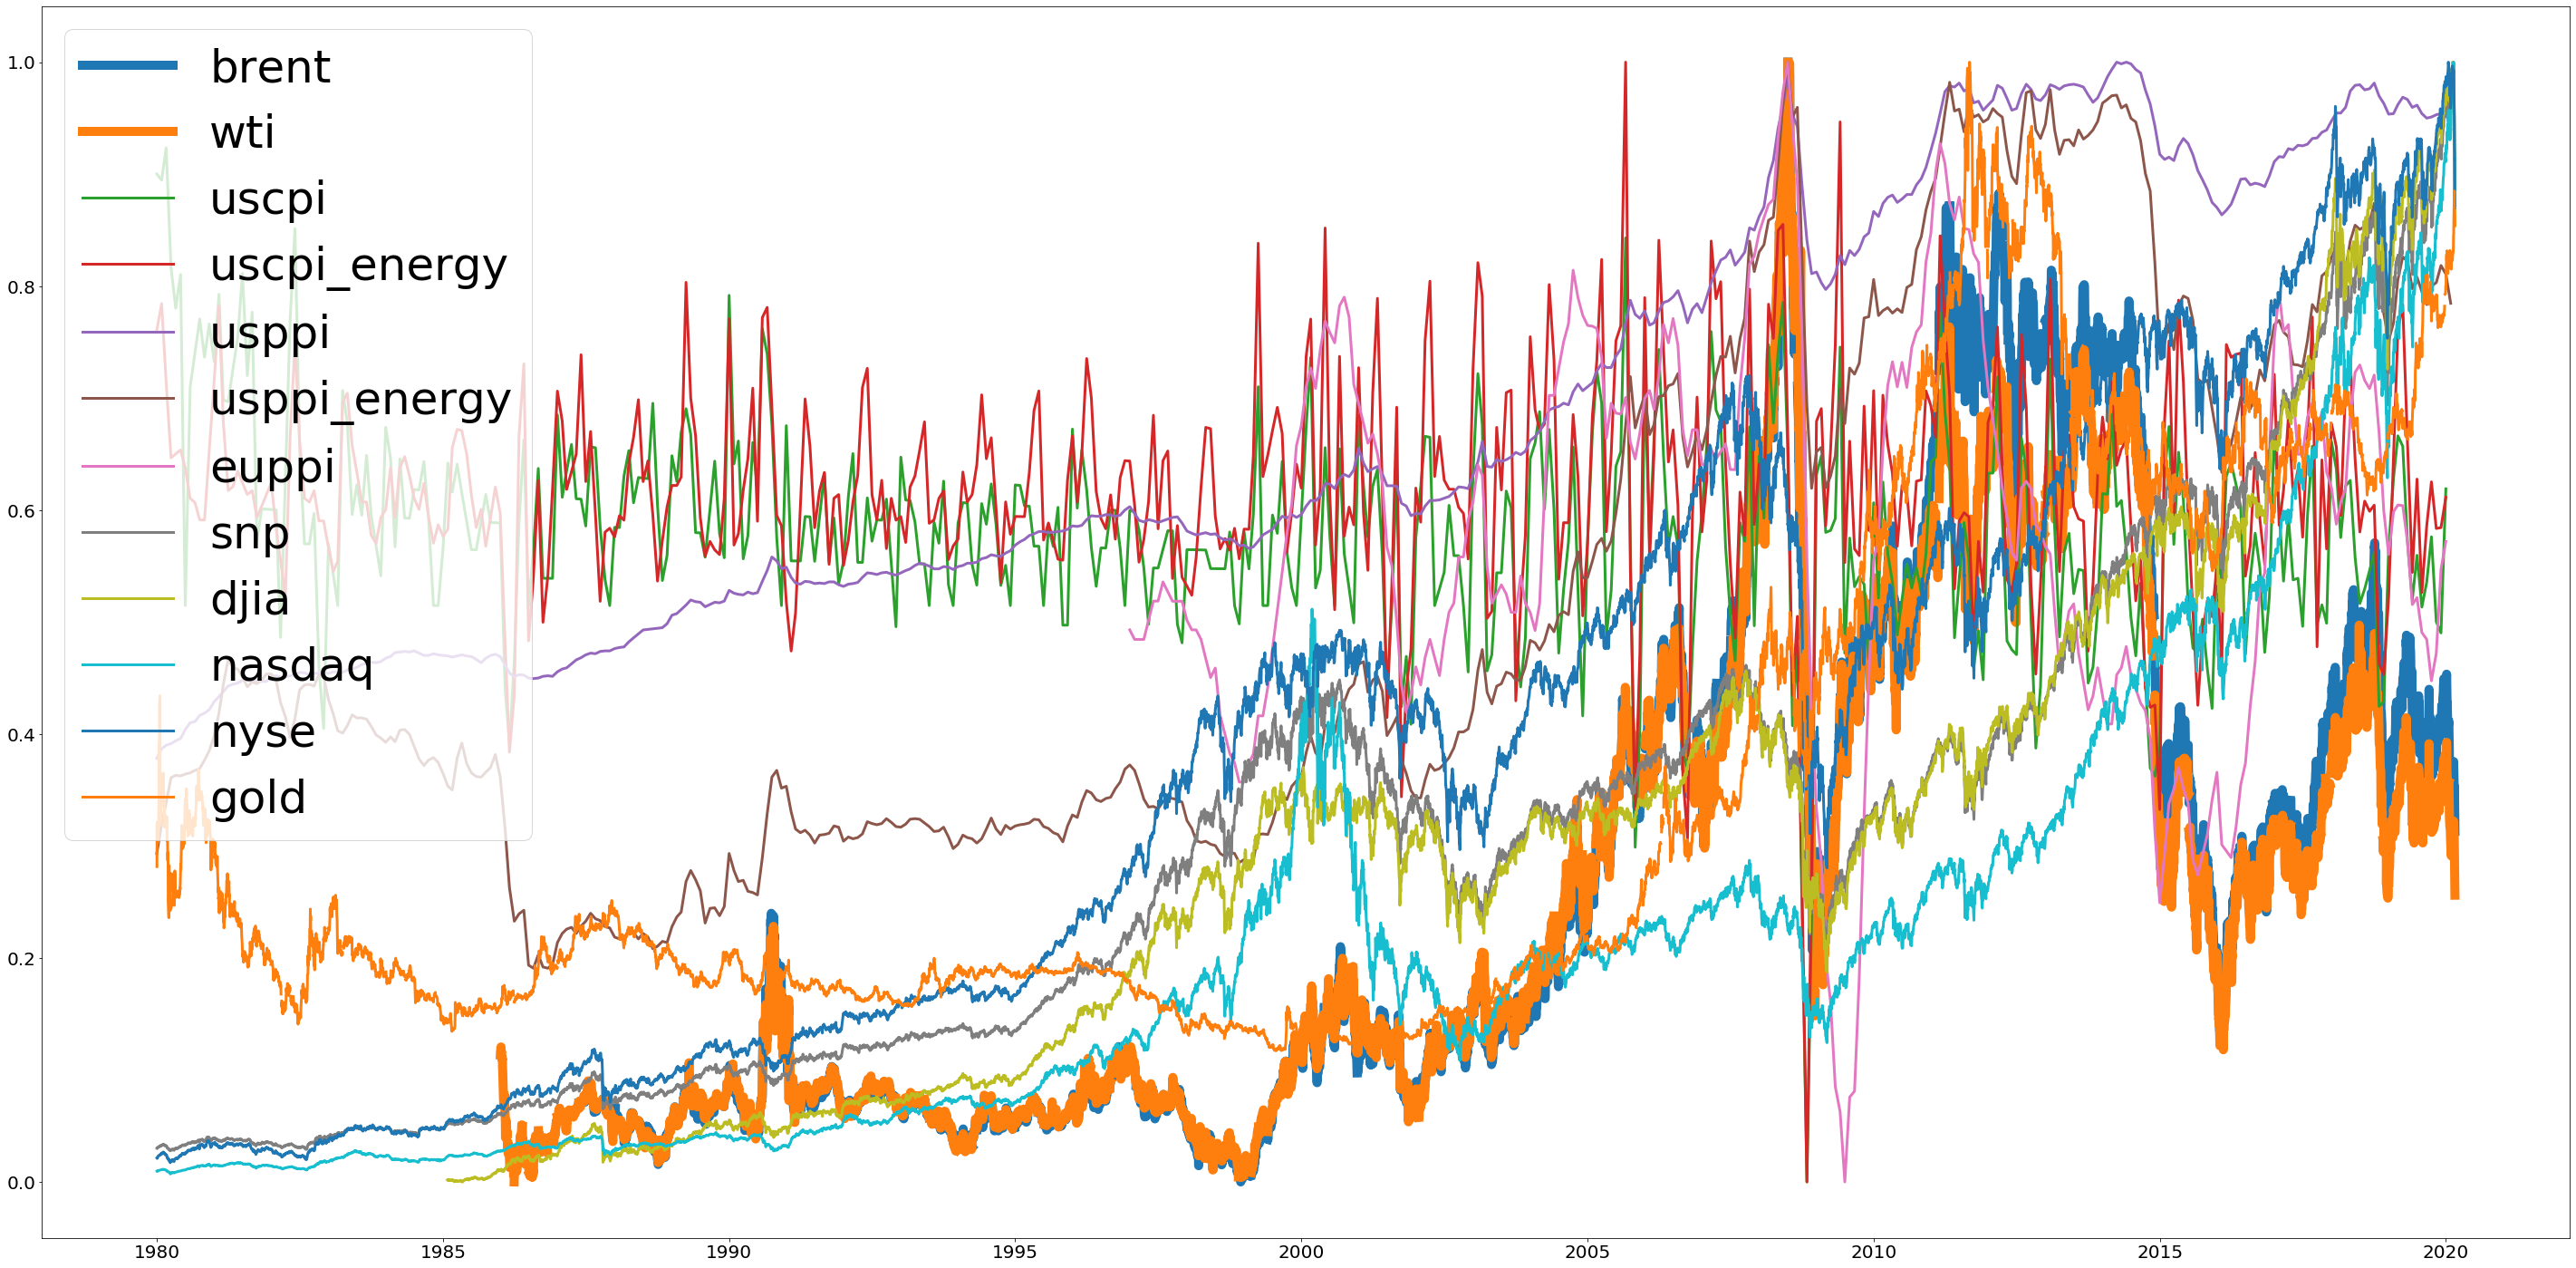

In [10]:
for dataname, data in dataset.items():
    # data cleansing
    data.columns = ["DATE", "VALUE"]
    data['DATE'] = pd.to_datetime(data['DATE'], errors = 'coerce')
    data = data.set_index("DATE")
    data['VALUE'] = pd.to_numeric(data['VALUE'], errors = 'coerce')
    
    # normalize data
    data = norm(data)
    
    # set data range
    data = data["1980-01-01":"2020-03-01"]
    
    # Ploting
    isoil = (dataname == "brent") or (dataname == "wti")
    if(isoil):
        plt.plot(data, label = dataname, linewidth = 10)
    else:    
        plt.plot(data, label = dataname, linewidth = 3)
    
#plt.legend()
plt.legend(fontsize = 50)
plt.rc('font', size = 20)
plt.rcParams["figure.figsize"] = (50,25)
plt.show()